<a href="https://colab.research.google.com/github/MANOJHRMANOJHR/ai_assignments/blob/main/ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: California Housing | samples=20640 | features=8
Head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
Target stats: mean=2.069 std=1.154
RMSE: 0.7456 | MAE: 0.5332
Saved: target_hist.png, true_vs_pred.png, model_card.json


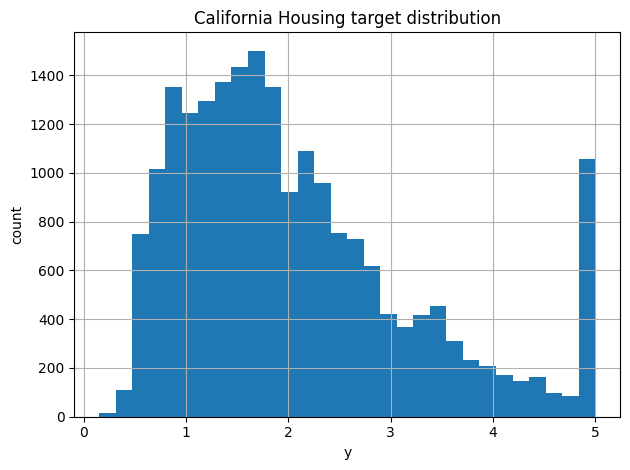

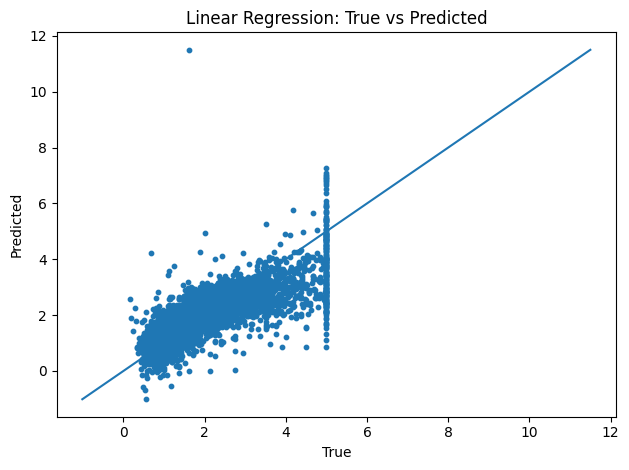

In [1]:
import json, os, sys, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import Bunch

def load_dataset():
    # Try California Housing; if fetch fails (no internet), fallback to Diabetes
    try:
        from sklearn.datasets import fetch_california_housing
        ds = fetch_california_housing(as_frame=True)
        name = "California Housing"
        X = ds.frame.drop(columns=[ds.target_names[0]])
        y = ds.frame[ds.target_names[0]]
        feature_names = list(X.columns)
        return Bunch(data=X, target=y, feature_names=feature_names, name=name)
    except Exception:
        from sklearn.datasets import load_diabetes
        ds = load_diabetes(as_frame=True)
        name = "Diabetes (fallback)"
        X = ds.frame.drop(columns=["target"])
        y = ds.frame["target"]
        feature_names = list(X.columns)
        return Bunch(data=X, target=y, feature_names=feature_names, name=name)

def quick_eda(X, y, name):
    print(f"Dataset: {name} | samples={len(X)} | features={len(X.columns)}")
    print("Head:\n", X.head(3))
    print("Target stats: mean={:.3f} std={:.3f}".format(y.mean(), y.std()))
    plt.figure()
    y.hist(bins=30)
    plt.title(f"{name} target distribution")
    plt.xlabel("y")
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig("target_hist.png")

def build_and_eval(X, y, feature_names):
    num_features = list(feature_names)
    pre = ColumnTransformer(
        transformers=[("num", StandardScaler(with_mean=True, with_std=True), num_features)],
        remainder="drop"
    )
    pipe = Pipeline([("pre", pre), ("lr", LinearRegression())])

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
    pipe.fit(Xtr, ytr)
    preds = pipe.predict(Xte)
    rmse = np.sqrt(mean_squared_error(yte, preds))
    mae = mean_absolute_error(yte, preds)

    print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    plt.figure()
    plt.scatter(yte, preds, s=10)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("Linear Regression: True vs Predicted")
    lims = [min(yte.min(), preds.min()), max(yte.max(), preds.max())]
    plt.plot(lims, lims)
    plt.tight_layout()
    plt.savefig("true_vs_pred.png")

    card = {
        "model": "LinearRegression",
        "dataset": "California Housing (fallback to Diabetes if offline)",
        "task": "Tabular regression",
        "preprocessing": "StandardScaler on all numeric features",
        "target": "MedianHouseValue (or Diabetes target)",
        "metrics": {"RMSE": rmse, "MAE": mae},
        "intended_use": "Intro ML coursework; not for real-estate decisions",
        "limitations": [
            "Linear model; no interaction/nonlinearity modeling",
            "No feature engineering; sensitive to scale/outliers"
        ],
        "owner": "Student",
    }
    with open("model_card.json", "w") as f:
        json.dump(card, f, indent=2)
    print("Saved: target_hist.png, true_vs_pred.png, model_card.json")
    return rmse, mae

if __name__ == "__main__":
    ds = load_dataset()
    quick_eda(ds.data, ds.target, ds.name)
    build_and_eval(ds.data, ds.target, ds.feature_names)
